In [1]:
import pandas as pd
import numpy as np

audi = pd.read_csv("audi.csv")
bmw = pd.read_csv("bmw.csv")
ford = pd.read_csv("ford.csv")
hyundi = pd.read_csv("hyundi.csv")
merc = pd.read_csv("merc.csv")
skoda = pd.read_csv("skoda.csv")
toyota = pd.read_csv("toyota.csv")
vauxhall = pd.read_csv("vauxhall.csv")
vw = pd.read_csv("vw.csv")

In [2]:
audi['brand'] = 'audi'
bmw['brand'] = 'bmw'
ford['brand'] = 'ford'
hyundi['brand'] = 'hyundi'
merc['brand'] = 'merc'
skoda['brand'] = 'skoda'
toyota['brand'] = 'toyota'
vauxhall['brand'] = 'vauxhall'
vw['brand'] = 'vw'

In [3]:
df = pd.concat([audi,bmw,
               ford,hyundi,merc,skoda,toyota,
               vauxhall,vw])
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,NaN


In [4]:
df.shape

(99187, 11)

In [5]:
df.drop('tax(£)',axis=1,inplace=True)

In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [7]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
15152,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,vw
15153,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,vw
15154,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,vw
15155,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,vw
15156,Fox,2007,2295,Manual,74000,Petrol,145.0,46.3,1.2,vw


In [8]:
df.shape

(99187, 10)

In [9]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,94327.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.256183,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.404805,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [10]:
#Dropping brand and model columns as already the remaining data is described based on these

df.drop(['brand','model'],axis=1,inplace=True)

In [11]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0


In [12]:

print(df['transmission'].unique())

print(df['fuelType'].unique())

['Manual' 'Automatic' 'Semi-Auto' 'Other']
['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric']


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

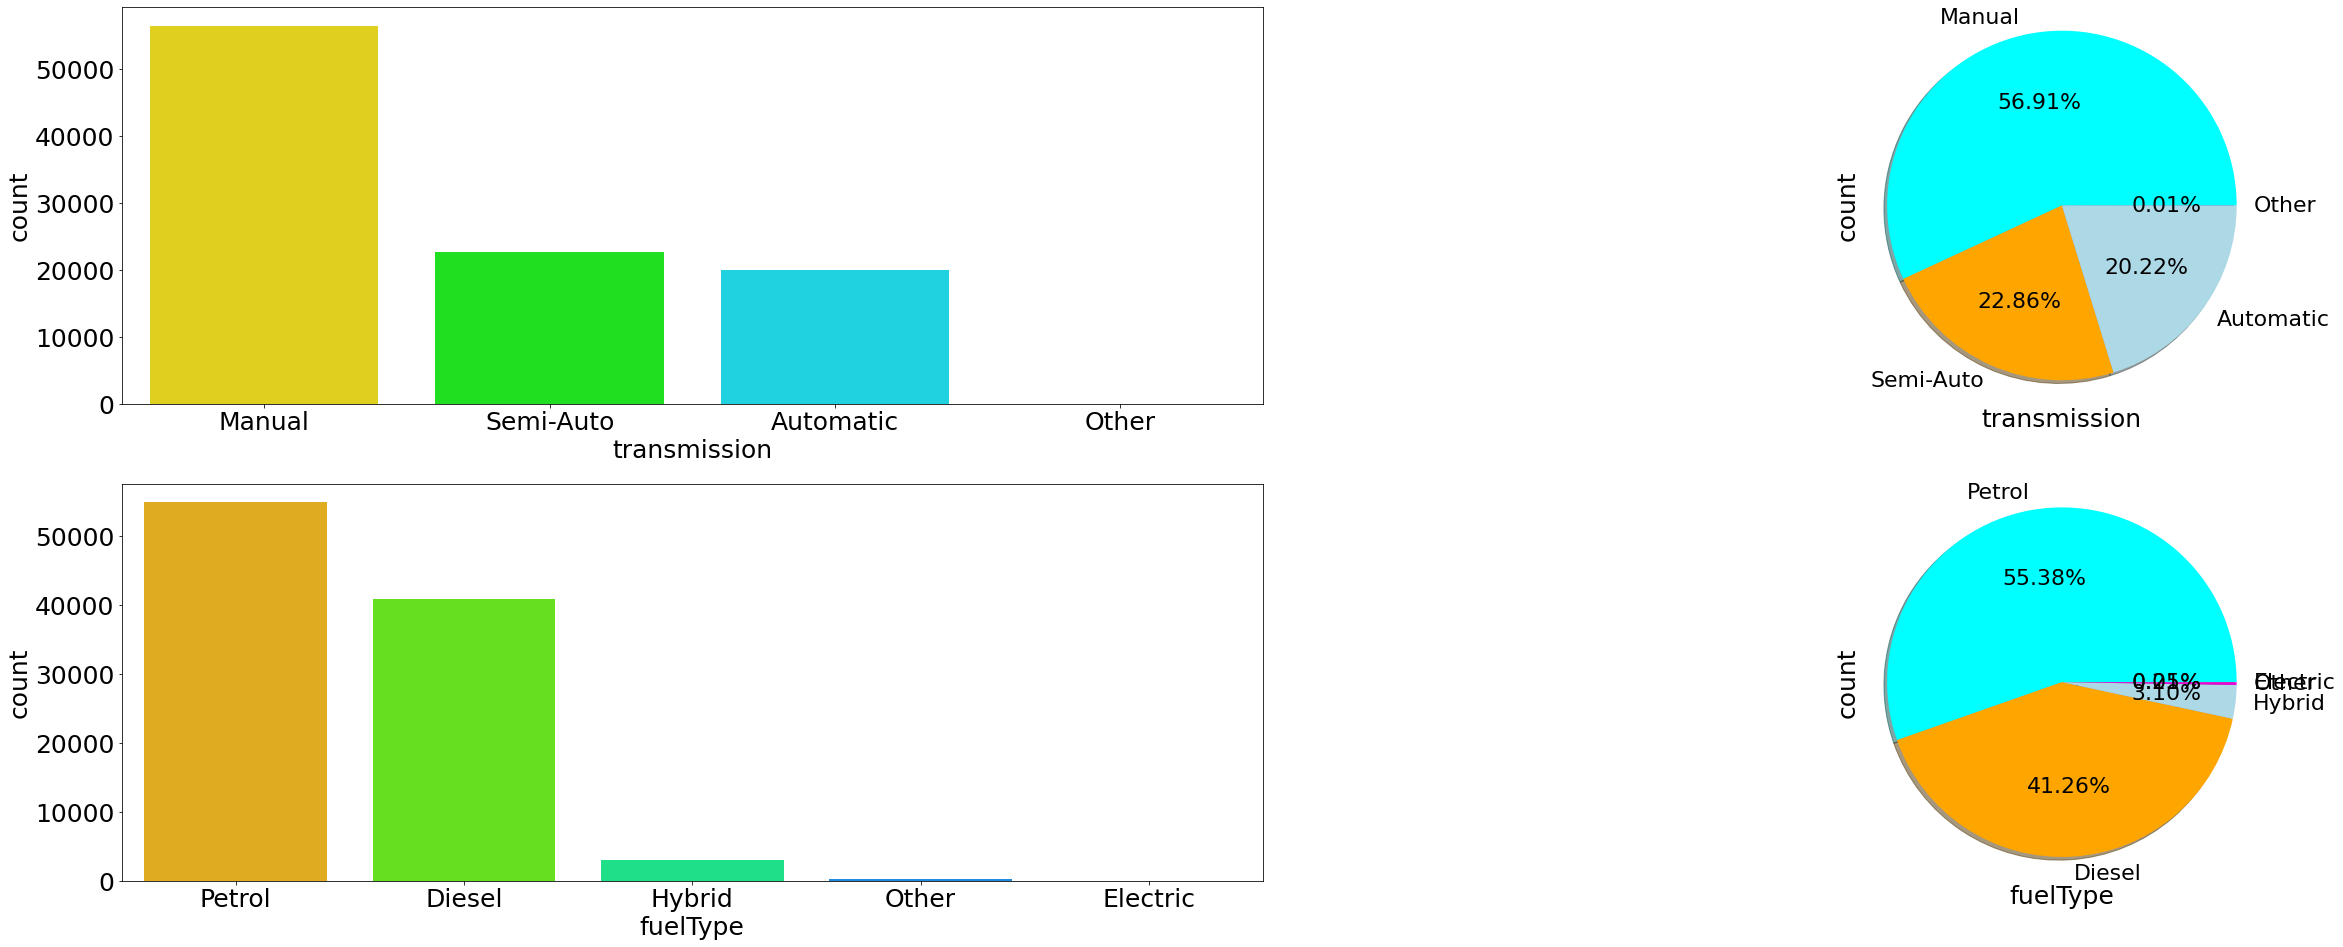

In [14]:
plot_columns=[ 'transmission','fuelType']
colors = ["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400","#EAE7C6","#CF6523","#99ACD2","#4EBA73","#DDA8D7"]
textprops = {"fontsize":22}
i=1
plt.figure(figsize=(45,95))
for col in plot_columns:
    plt.subplot(11,2,i)
    sns.countplot(data=df,x=col,palette='gist_rainbow',order=df[col].value_counts().index)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('count',fontsize=25)
    i=i+1
    plt.subplot(11,2,i)
    df[col].value_counts().plot(kind='pie',autopct='%.2f%%',
                               colors=colors,textprops=textprops,shadow=True,radius=1.1)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('count',fontsize=25)
    i=i+1
plt.show()

In [15]:
df.isnull().sum()

year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             4860
mpg                0
engineSize         0
dtype: int64

In [16]:
# Replacing null values with mean
df['tax'].fillna(df['tax'].mean(),inplace=True)

In [17]:
#Finding duplicate rows and deleting

df.duplicated().sum()
df=df.drop_duplicates(keep="first")

In [18]:
#Replacing Other data with the majority data.

df['transmission'].replace(to_replace ='Other',
                 value ="Manual",inplace=True)
print(df['transmission'].unique())



['Manual' 'Automatic' 'Semi-Auto']


In [19]:
df['fuelType'].replace(to_replace ="Other",
                 value ="Petrol",inplace=True)
print(df['fuelType'].unique())

['Petrol' 'Diesel' 'Hybrid' 'Electric']


In [20]:
df['years']=2021-df['year']
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,years
0,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,4
1,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,5
2,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,5
3,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,4
4,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,2


In [21]:
df.drop(['year'],axis=1,inplace=True)

In [22]:
df.head()

,price,transmission,mileage,fuelType,tax,mpg,engineSize,years
0,12500,Manual,15735,Petrol,150.0,55.4,1.4,4
1,16500,Automatic,36203,Diesel,20.0,64.2,2.0,5
2,11000,Manual,29946,Petrol,30.0,55.4,1.4,5
3,16800,Automatic,25952,Diesel,145.0,67.3,2.0,4
4,17300,Manual,1998,Petrol,145.0,49.6,1.0,2


In [23]:
#Converting categorical into numerical
finaldf=pd.get_dummies(df,drop_first=True)

In [24]:
finaldf.head()

,price,mileage,tax,mpg,engineSize,years,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol
0,12500,15735,150.0,55.4,1.4,4,1,0,0,0,1
1,16500,36203,20.0,64.2,2.0,5,0,0,0,0,0
2,11000,29946,30.0,55.4,1.4,5,1,0,0,0,1
3,16800,25952,145.0,67.3,2.0,4,0,0,0,0,0
4,17300,1998,145.0,49.6,1.0,2,1,0,0,0,1


In [25]:
import seaborn as sns

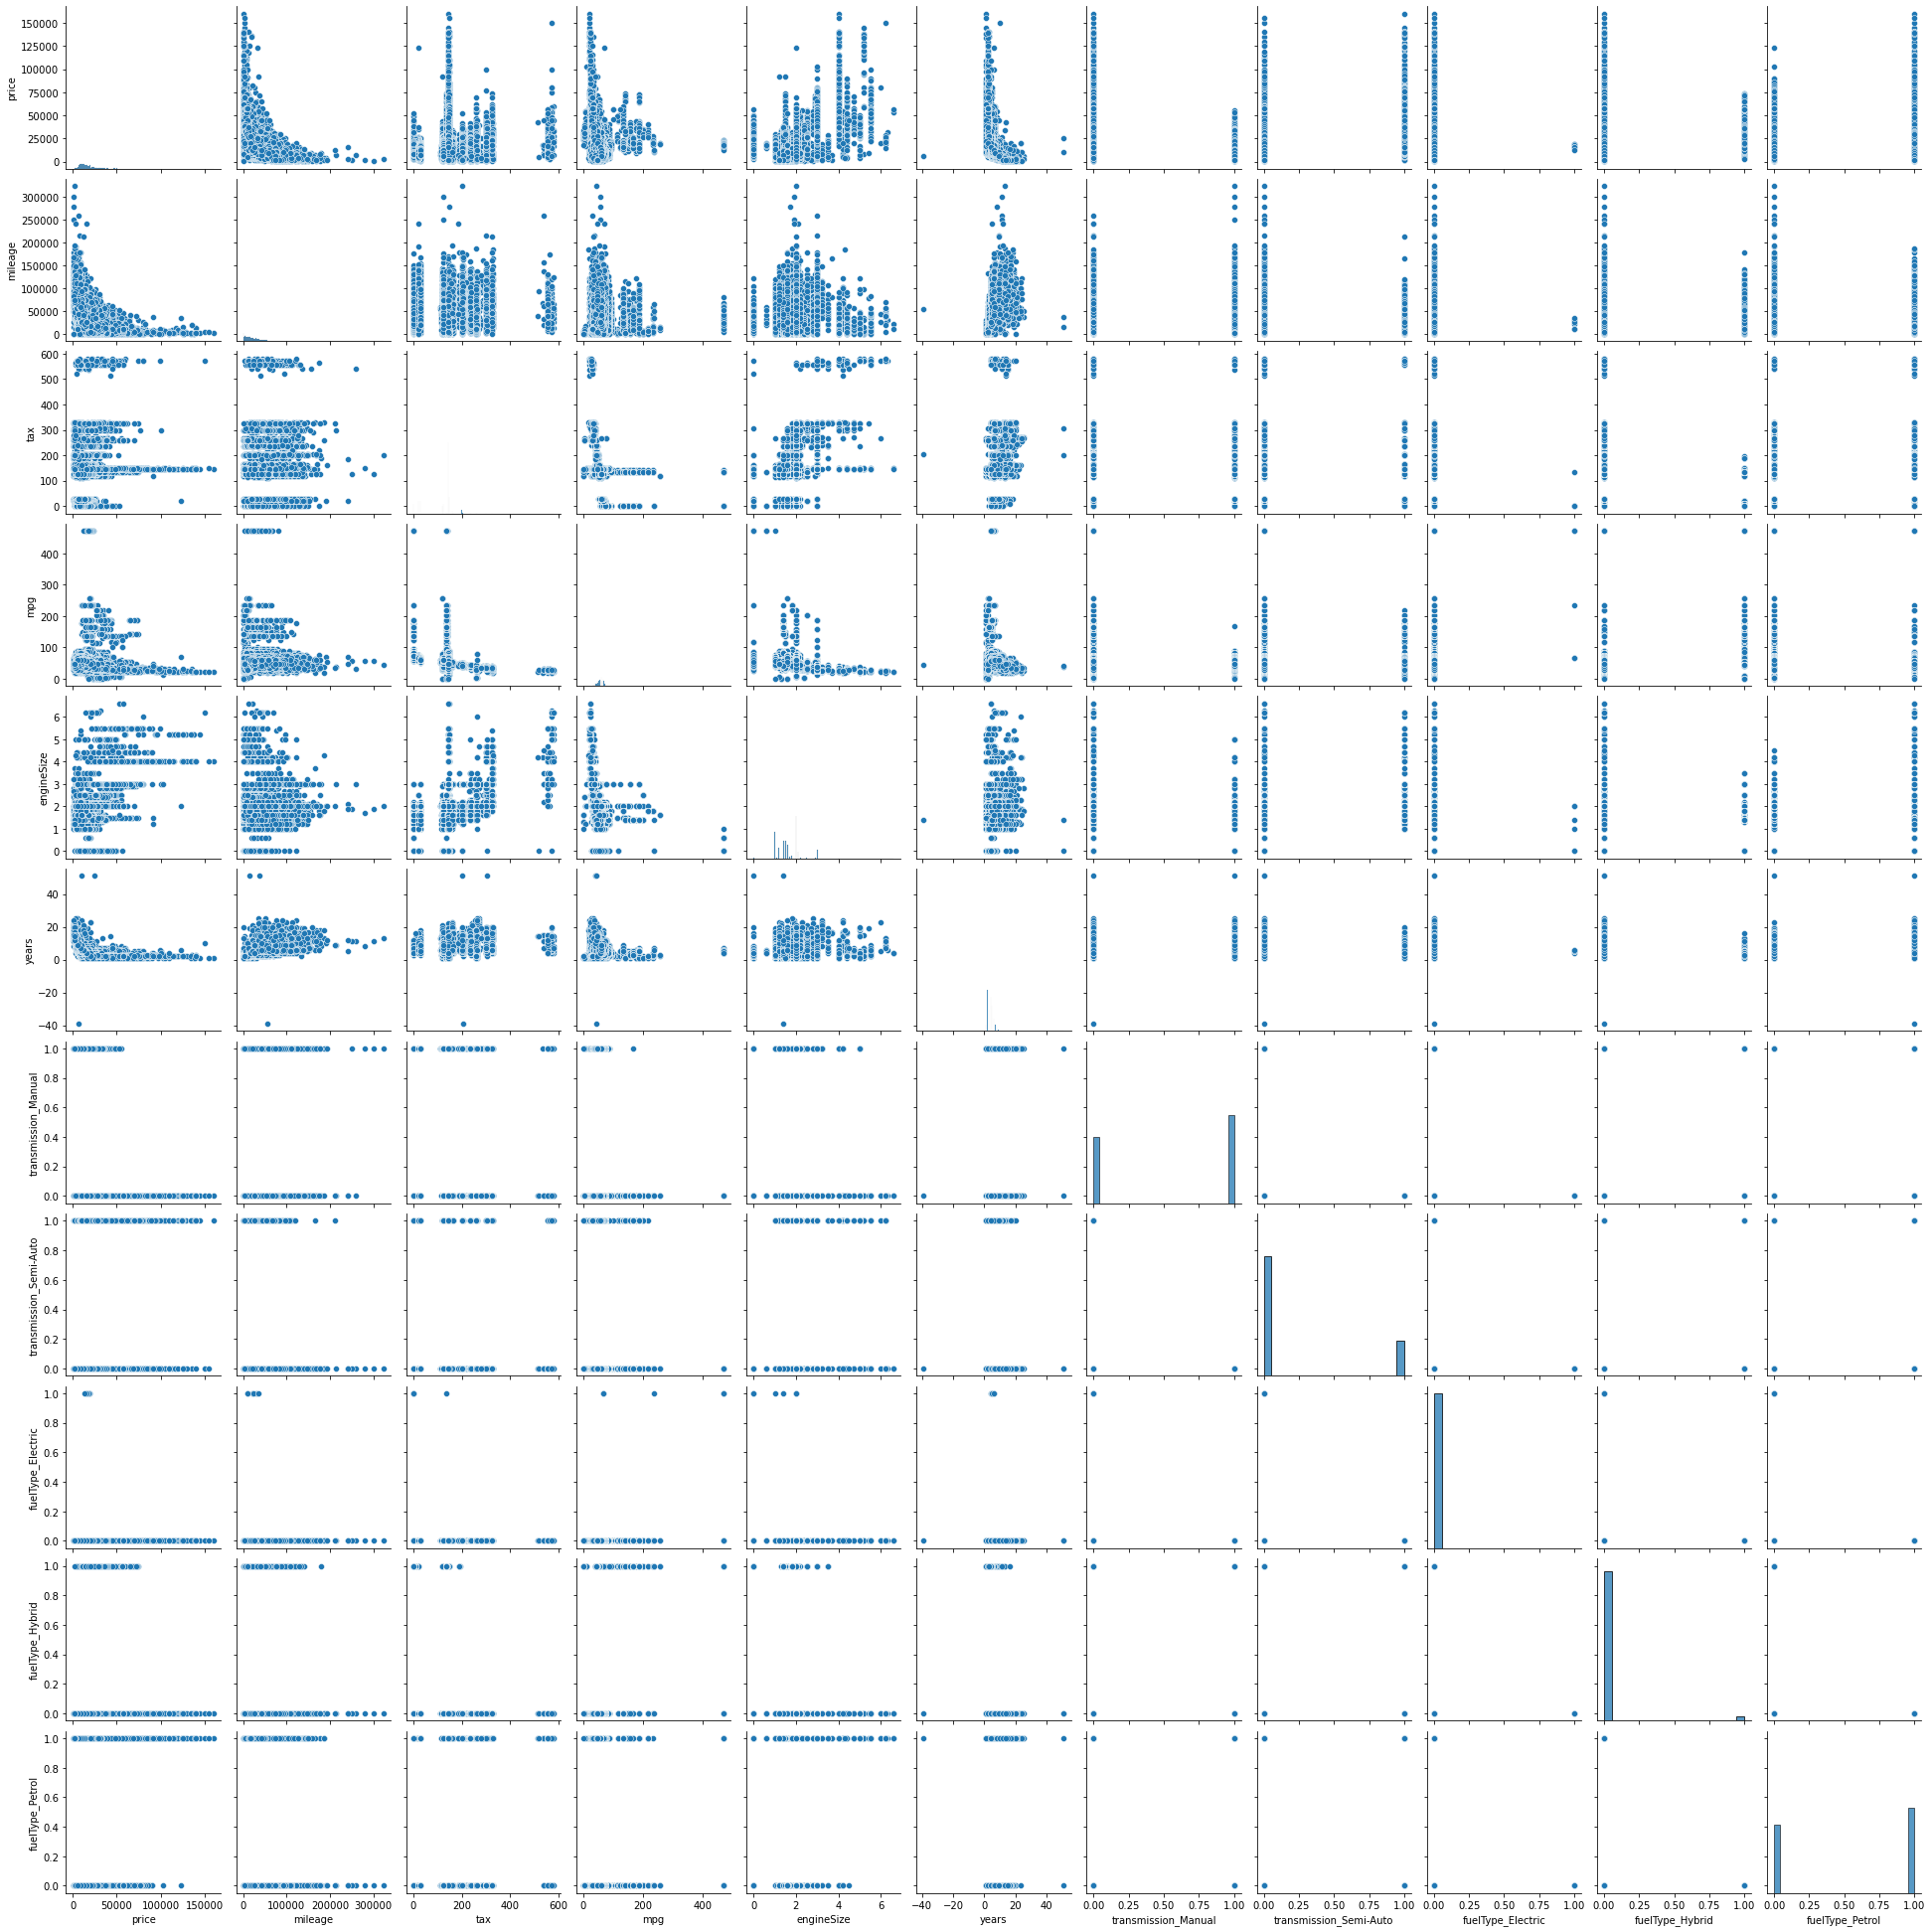

In [26]:
sns.pairplot(finaldf)

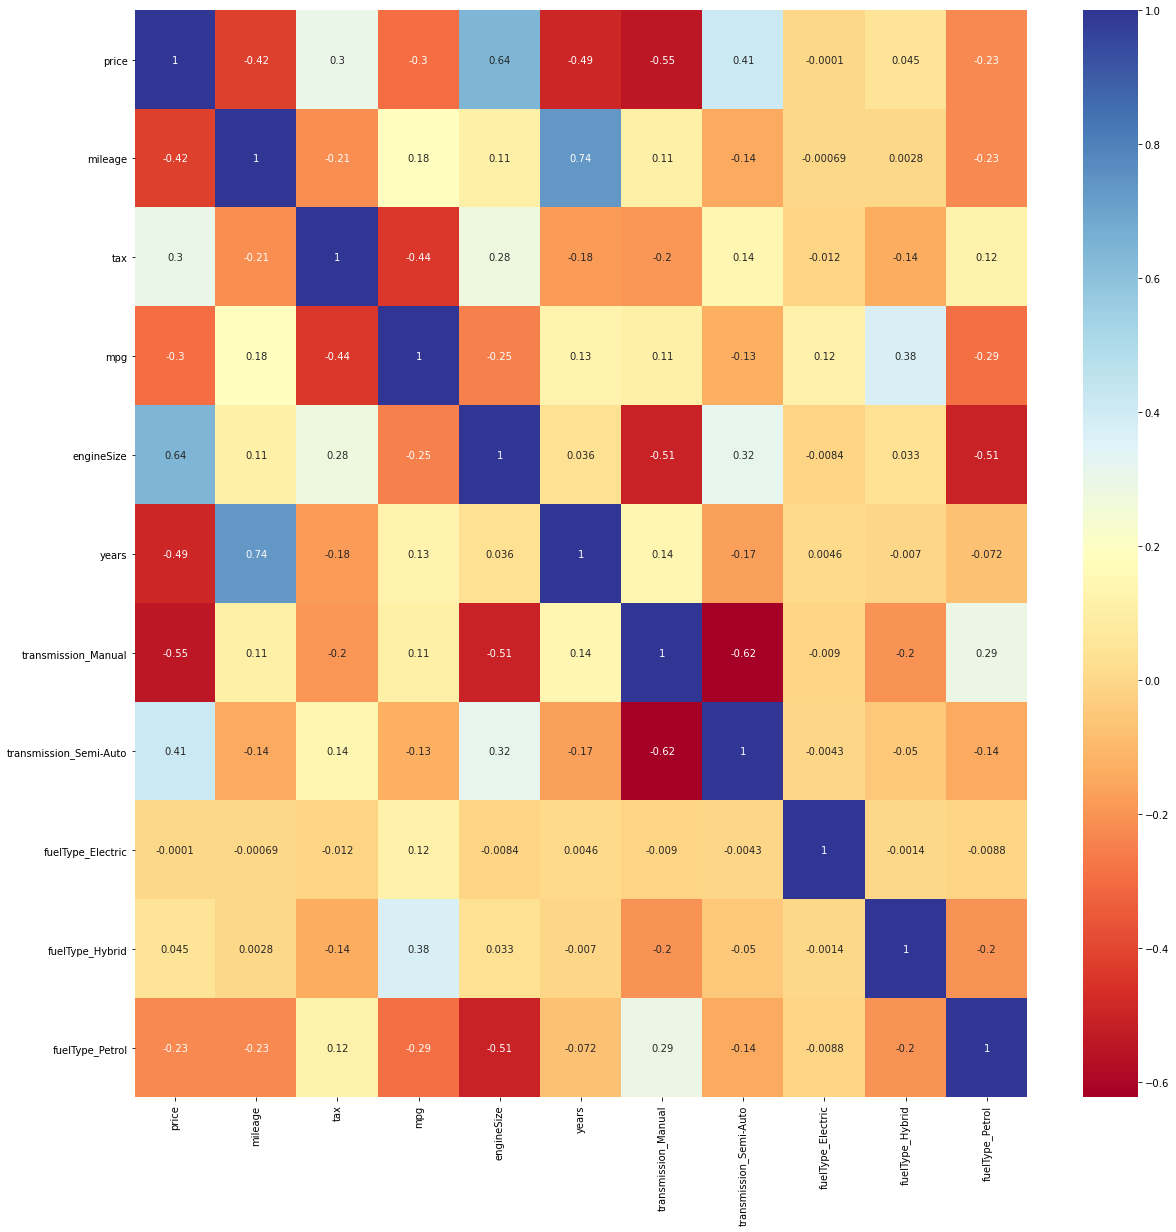

In [27]:
#plot heat map   

corrmat=finaldf.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(finaldf[top_corr_features].corr(),annot=True,cmap="RdYlBu")


In [28]:
x=finaldf.drop('price',axis=1)
x.head()

,mileage,tax,mpg,engineSize,years,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Petrol
0,15735,150.0,55.4,1.4,4,1,0,0,0,1
1,36203,20.0,64.2,2.0,5,0,0,0,0,0
2,29946,30.0,55.4,1.4,5,1,0,0,0,1
3,25952,145.0,67.3,2.0,4,0,0,0,0,0
4,1998,145.0,49.6,1.0,2,1,0,0,0,1


In [29]:
y=finaldf['price']
y.head()

0    12500
1    16500
2    11000
3    16800
4    17300
Name: price, dtype: int64

In [30]:
###Feture importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

[1.50813303e-01 4.86037595e-02 1.16083699e-01 2.32221845e-01
 1.26560270e-01 2.98473985e-01 6.05344364e-03 4.50491386e-06
 2.07101011e-03 1.91141796e-02]


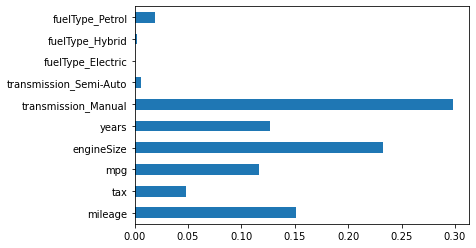

In [31]:
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.plot(kind='barh')    #FOR top 5 (feat_importances.nlargest(5)plot(kind='barh'))
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
from sklearn.ensemble import RandomForestRegressor


#Hyper parameters

import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [34]:
# Create random grid
#use random grid to search for best hyperparameters

randomgrid={'n_estimators':n_estimators,
             'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
print(randomgrid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [35]:
rf=RandomForestRegressor()
   
from sklearn.model_selection import RandomizedSearchCV


In [36]:
rf_random=RandomizedSearchCV(estimator=rf,
    param_distributions=randomgrid,
     scoring='neg_mean_squared_error',n_iter=10,cv=5,
                         
    verbose=2,
   
    random_state=42, n_jobs=1)

In [37]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  26.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  25.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  22.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  24.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  23.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  37.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  37.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
predictions=rf_random.predict(x_test)


In [39]:
import sklearn.metrics as sm
print("R2 score =", round(sm.r2_score(y_test, predictions), 2))

R2 score = 0.92


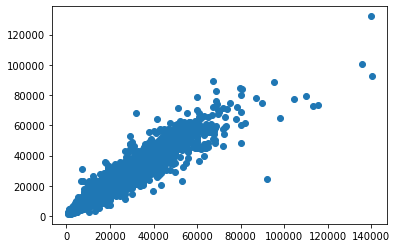

In [40]:
plt.scatter(y_test,predictions)


plt.show()

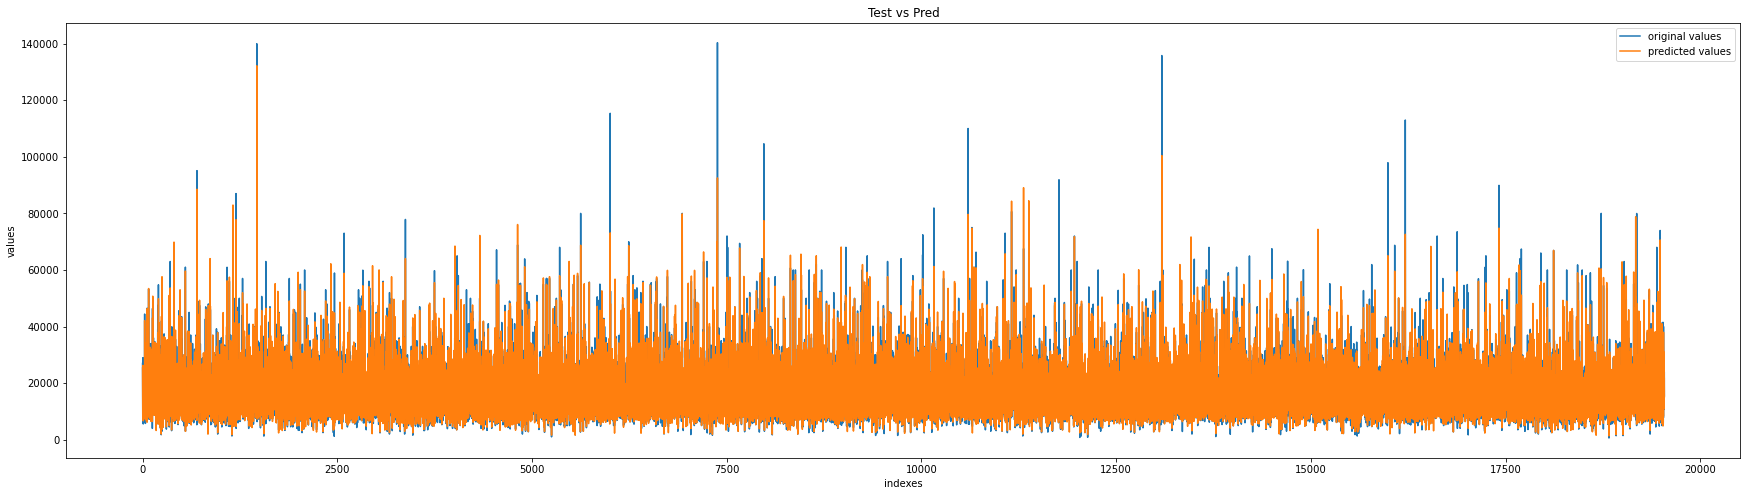

In [41]:
pred2=pd.DataFrame(predictions)

plt.figure(figsize = (30, 8))
index=y_test.reset_index()["price"]
ax=index.plot(label="original values")
ax=pred2[0].plot(label = "predicted values")
plt.legend(loc='upper right')
plt.title("Test vs Pred")
plt.xlabel("indexes")
plt.ylabel("values")
plt.show()

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 1705.0133318061835
MSE: 7715862.161463453
RMSE: 2777.744077747886
